In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import glob
import subprocess

In [2]:
def save_png(measures, filename, table_name="", columns=[u"#", u"Frequency, kHz"]):
    dataframe = pd.DataFrame(data=measures, 
                                 index=range(1, len(measures) + 1), 
                                 columns=columns)
    if columns[0] == "#":
        dataframe[columns[0]] = dataframe[columns[0]].astype('int32')
    dataframe.to_html("{}.html".format(filename))
#============================= Adding caption =========================
    with open("{}.html".format(filename), "r") as fin:
        lines = fin.readlines()

    lines = lines[0:1] + [u"<caption>{}</caption>\n".format(table_name)] + lines[1:]
    with open("{}.html".format(filename), "w") as fout:
        for line in lines:
            print(line, file=fout)
#======================================================================
    subprocess.call("wkhtmltoimage -f png --width 0 {}.html {}.png".format(filename, filename), shell=True)
#============================ Clean up ================================
    files = glob.glob('{}.html'.format(filename))
    for f in files:
        os.remove(f)

In [3]:
m1 = 501.8 # г
m2 = 505.5 # г
m3 = 499.4 # г
m = 59.3   # г


In [4]:
measures_1 = np.array([[0, 0],
                       [1, 136.3],
                       [3, 409.7],
                       [5, 686.8],
                       [7, 969.52],
                       [9, 1252],
                       [11, 1535.1]])

measures_2 = np.array([[0, 0],
                       [1, 150.8],
                       [3, 449.7],
                       [5, 751.2],
                       [7, 1056.6]])

In [5]:
save_png(measures_1, "string_measures_freq_case1", table_name="Measures [Case 1]")
save_png(measures_2, "string_measures_freq_case2", table_name="Measures [Case 2]")

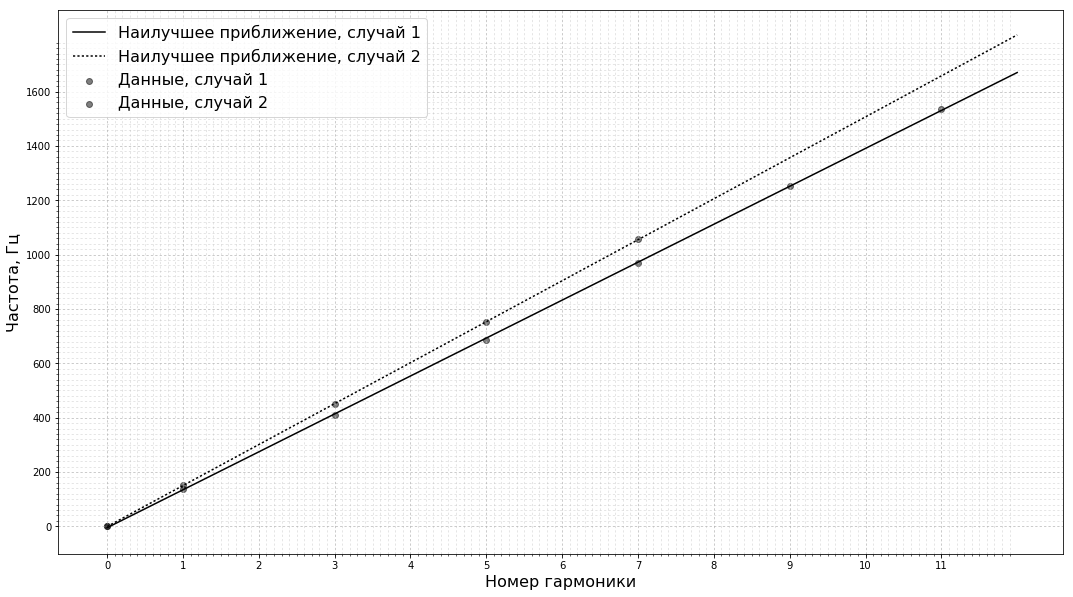

In [6]:
grid = np.linspace(0, 12, 500)
ax = plt.figure(figsize=(18, 10)).add_subplot(1,1,1)
for i, measure, linestyle in zip([1, 2], 
                                 [measures_1, measures_2],
                                 ['solid','dotted']):
    num = measure[:, 0]
    freq = measure[:, 1]
    k, b = np.polyfit(num, freq, 1)
    ax.scatter(num, freq, label="Данные, случай {}".format(i), alpha=0.5, color='black')
    ax.plot(grid, k * grid + b, 
            color='black', label="Наилучшее приближение, случай {}".format(i), ls=linestyle)

minor_xticks = np.arange(np.min(grid), np.max(grid), 0.1)
major_xticks = np.arange(np.min(grid), np.max(grid), 1)
minor_yticks = np.arange(0, 1800, 20)
major_yticks = np.arange(0, 1800, 200)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.4, ls=':')
ax.grid(which='major', alpha=0.6, ls=':')

plt.xlabel('Номер гармоники', fontsize=16)
plt.ylabel('Частота, Гц', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.savefig("string_graphics_all harmonics.png")
plt.show()

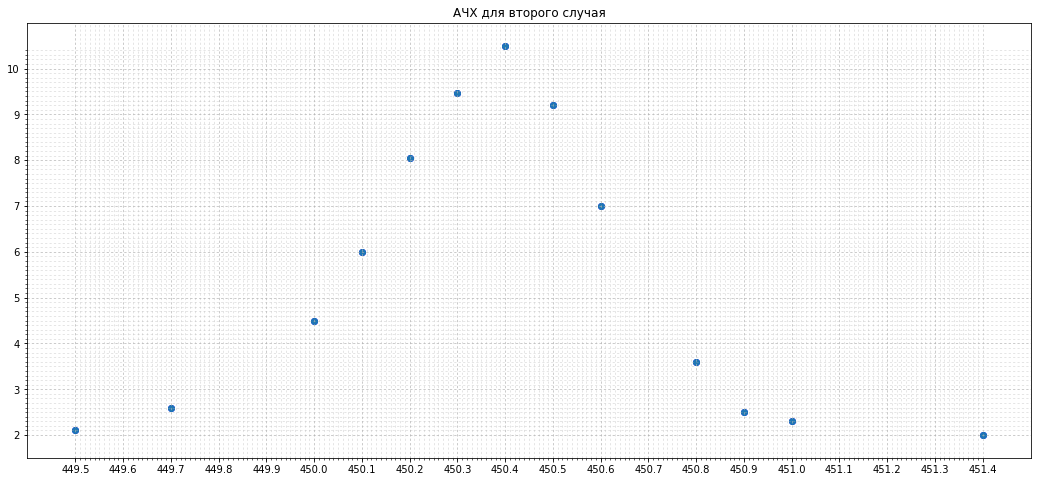

In [9]:
afc_measures = np.array([[450.4, 10.5],
                [450.3, 9.46],
                [450.0, 4.5],
                [449.5, 2.1],
                [449.7, 2.6],
                [450.2, 8.05],
                [450.1, 6],
                [450.5, 9.2],
                [450.6, 7],
                [450.8, 3.6],
                [451,   2.3],
                [451.4, 2],
                [450.9, 2.5]])

ax = plt.figure(figsize=(18, 8)).add_subplot(1,1,1)
plt.scatter(afc_measures[:, 0], afc_measures[:, 1], label="Случай 2", color='blue')

minor_xticks = np.arange(np.min(afc_measures[:, 0]), np.max(afc_measures[:, 0]), 0.01)
major_xticks = np.arange(np.min(afc_measures[:, 0]), np.max(afc_measures[:, 0]) + 0.1, 0.1)
minor_yticks = np.arange(np.min(afc_measures[:, 1]), np.max(afc_measures[:, 1]), 0.1)
major_yticks = np.arange(np.min(afc_measures[:, 1]), np.max(afc_measures[:, 1]), 1)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.4, ls=':')
ax.grid(which='major', alpha=0.6, ls=':')

plt.title("АЧХ для второго случая")
plt.scatter(afc_measures[:, 0], afc_measures[:, 1], label="Случай 2")
plt.savefig("string_graphics_afc.png")
plt.show()


In [8]:
save_png(afc_measures, 'string_measures_afc_case2', columns=["Frequency, kHz", "Amplitude"], 
         table_name="Amplitude-Frequency characteristics [Case 2]")